In [1]:
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO

In [5]:
pd.read_csv('../data/ucyna_proteins_eggnog.tsv', sep='\t', comment='#', header=None)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,BDA39162.1,1527444.ucyna2_00820,1.480000e-247,679.0,"COG0536@1|root,COG0536@2|Bacteria,1G019@1117|C...",1117|Cyanobacteria,S,"An essential GTPase which binds GTP, GDP and p...",obg,-,...,ko:K03979,-,-,-,-,"ko00000,ko01000,ko03009",-,-,-,"GTP1_OBG,MMR_HSR1"
1,BDA39163.1,1527444.ucyna2_00819,0.000000e+00,3700.0,"COG2911@1|root,COG2982@1|root,COG2911@2|Bacter...",1117|Cyanobacteria,U,Family of,-,-,...,ko:K09800,-,-,-,-,"ko00000,ko02000",-,-,-,"DUF748,TamB"
2,BDA39164.1,1527444.ucyna2_00818,2.670000e-131,372.0,"2CCJT@1|root,2ZC3W@2|Bacteria,1G547@1117|Cyano...",1117|Cyanobacteria,S,Protein of unknown function (DUF2808),-,-,...,-,-,-,-,-,-,-,-,-,DUF2808
3,BDA39165.1,1527444.ucyna2_00817,4.390000e-62,190.0,"2CJ3S@1|root,32S96@2|Bacteria,1G7NX@1117|Cyano...",1117|Cyanobacteria,S,Protein of unknown function (DUF3593),-,-,...,-,-,-,-,-,-,-,-,-,DUF3593
4,BDA39166.1,1527444.ucyna2_00816,1.940000e-76,228.0,"2DMI8@1|root,32RQE@2|Bacteria,1G7QT@1117|Cyano...",1117|Cyanobacteria,S,InterPro IPR019634,ycf49,-,...,-,-,-,-,-,-,-,-,-,DUF2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,BDA40343.1,1527444.ucyna2_00205,1.760000e-39,130.0,"2E4QG@1|root,32ZJ2@2|Bacteria,1G94V@1117|Cyano...",1117|Cyanobacteria,S,Protein of unknown function (DUF2862),-,-,...,-,-,-,-,-,-,-,-,-,DUF2862
1153,BDA40344.1,1527444.ucyna2_00204,1.820000e-255,701.0,"COG0003@1|root,COG0003@2|Bacteria,1G2DI@1117|C...",1117|Cyanobacteria,P,PFAM Anion-transporting ATPase,-,-,...,-,-,-,-,-,-,-,-,-,ArsA_ATPase
1154,BDA40345.1,1527444.ucyna2_00203,6.190000e-162,452.0,"COG5485@1|root,COG5485@2|Bacteria,1G2FT@1117|C...",1117|Cyanobacteria,S,SPTR Pathogenesis related protein-like protein,-,-,...,-,-,-,-,-,-,-,-,-,SnoaL
1155,BDA40346.1,1527444.ucyna2_00202,0.000000e+00,1082.0,"COG4108@1|root,COG4108@2|Bacteria,1G0Y8@1117|C...",1117|Cyanobacteria,J,Increases the formation of ribosomal terminati...,prfC,-,...,ko:K02837,-,-,-,-,"ko00000,ko03012",-,-,-,"GTP_EFTU,GTP_EFTU_D2,RF3_C"


In [6]:
df = pd.read_csv('../results/ucyna_proteins_interpro.tsv', sep='\t')
df.columns = [
    "accession",
    "sequence_md5",
    "sequence_length",
    "analysis",
    "signature_accession",
    "signature_description",
    "start",
    "stop",
    "score",
    "status",
    "date",
    "interpro_accession",
    "interpro_description",
    "go",
    "pathway",
]

In [10]:
(df['pathway'] != "-" ).sum() / len(df) * 100

np.float64(60.68276597808166)

In [12]:
df_missing = pd.read_csv('../results/ucyna_missing_interpro.tsv', sep='\t')
df_missing.columns = [
    "accession",
    "sequence_md5",
    "sequence_length",
    "analysis",
    "signature_accession",
    "signature_description",
    "start",
    "stop",
    "score",
    "status",
    "date",
    "interpro_accession",
    "interpro_description",
    "go",
    "pathway",
]

(df_missing['pathway'] != "-" ).sum() / len(df_missing) * 100

np.float64(60.68276597808166)

In [23]:
pathways.iloc[100]

'MetaCyc:PWY-7884|Reactome:R-BTA-9837999|Reactome:R-CEL-9837999|Reactome:R-HSA-9837999|Reactome:R-MMU-9837999'

20.313249160939748
20.760747962282245
58.92600287677801


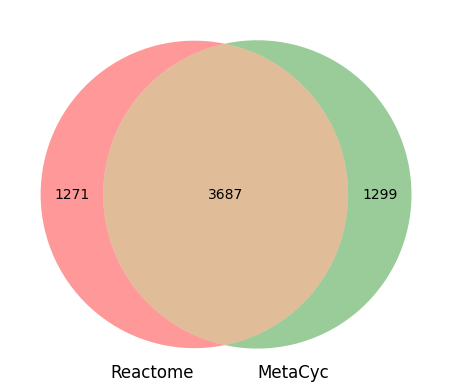

In [21]:
pathways = df[df['pathway'] != "-"]['pathway'] #.map(lambda x: x.split('|')).explode().map(lambda x: x.split(':')[0]).value_counts()

pathway_dbs = pathways.map(lambda row: list(set([x.split(':')[0] for x in row.split('|')])))
reactome_only = pathway_dbs.map(lambda x: x == ['Reactome'])
meta_cyc_only = pathway_dbs.map(lambda x: x == ['MetaCyc'])
both = pathway_dbs.map(lambda x: 'Reactome' in x and 'MetaCyc' in x)

print(reactome_only.sum() / len(pathway_dbs) * 100)
print(meta_cyc_only.sum() / len(pathway_dbs) * 100)
print(both.sum() / len(pathway_dbs) * 100)

import matplotlib_venn

matplotlib_venn.venn2(subsets=(reactome_only.sum(), meta_cyc_only.sum(), both.sum()), set_labels=('Reactome', 'MetaCyc'))